In [ ]:
!pip install matplotlib deap

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [ ]:
maze = [
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
]

start = (0, 0)
end = (len(maze) - 1, len(maze[0]) - 1)

In [ ]:
creator.create('FitnessMin', base.Fitness, weights = (-1.0,))
# weights will have an array, -1.0 denotes we have to give priority to the one with lower fitness value

creator.create('Individual', list, fitness = creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register('attr_direction', random.choice, ['U', 'D', 'L', 'R'])
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_direction, n = 100)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
def evaluate(individual):

  x, y = start

  for move in individual:

    if move == 'U':
      y = max(0, y-1)
    elif move == 'D':
      y = min(len(maze)-1, y+1)
    elif move == 'L':
      x = max(0, x-1)
    elif move == 'R':
      x = min(len(maze[0])-1, x+1)

    if (x, y) == end:
      return (0,)

    if maze[y][x] == 1:
      break

  return (abs(end[0]-x) + abs(end[1]-y),)

In [ ]:
def custom_mutate(individual, indpb = 0.2):

  directions = ['U', 'D', 'L', 'R']

  for i in range(len(individual)):
    if random.random() < indpb:
      possible_directions = [d for d in directions if d != individual[i]]
      individual[i] = random.choice(possible_directions)

  return individual,

In [ ]:
toolbox.register('evaluate', evaluate)
toolbox.register('select', tools.selTournament, tournsize = 3)
toolbox.register('mate', tools.cxUniform, indpb = 0.5)
toolbox.register('mutate', custom_mutate, indpb = 0.2)

In [ ]:
def plot_path(individual):

  x, y = start
  plt.plot(x, y, 'go')

  for move in individual:

    next_x, next_y = x, y
    if move == 'U': next_y = max(0, y-1)
    elif move == 'D': next_y = min(len(maze)-1, y+1)
    elif move == 'L': next_x = max(0, x-1)
    elif move == 'R': next_x = min(len(maze[0])-1, x+1)

    if maze[next_y][next_x] == 1 or (next_x, next_y) == end: break

    x, y = next_x, next_y
    plt.plot(x, y, 'bo')

  plt.plot(end[0], end[1], 'ro')
  plt.imshow(maze, cmap = 'binary')
  plt.show()

In [ ]:
def run_genetic_algorithm(generations = 2000, population_size = 500):

  pop = toolbox.population(n = population_size)
  best_individuals = []

  for gen in range(generations):
    offspring = algorithms.varAnd(pop, toolbox, cxpb = 0.5, mutpb = 0.2)
    fits = toolbox.map(toolbox.evaluate, offspring)

    for fit, ind in zip(fits, offspring):
      ind.fitness.value = fit

    pop = toolbox.select(offspring, k = len(pop))
    top_individual = tools.selBest(pop, k = 1)[0]
    best_individuals.append(top_individual)

    if gen in [2, 10, 50, 100, 500] or gen == generations - 1:
      print(f'Generation {gen}:')
      plot_path(top_individual)

Generation 2:


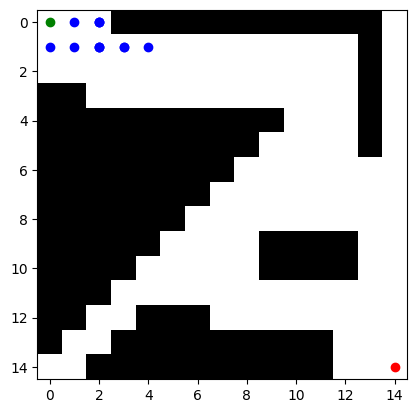

Generation 10:


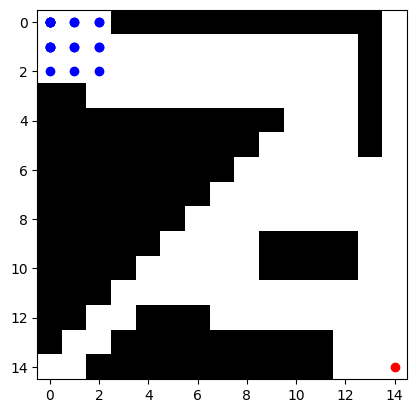

Generation 50:


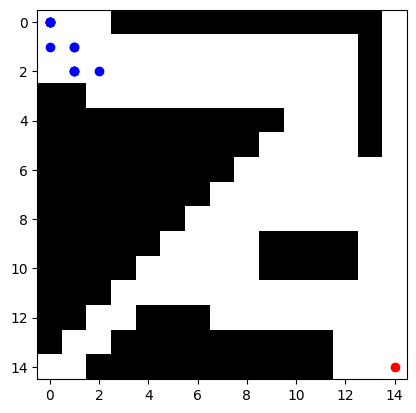

Generation 100:


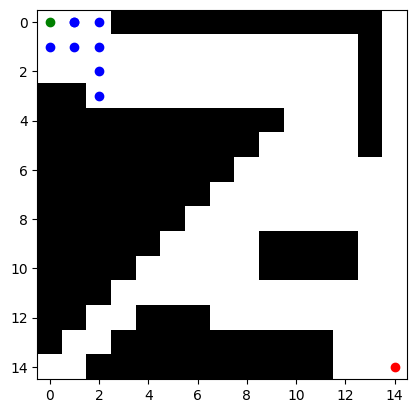

Generation 500:


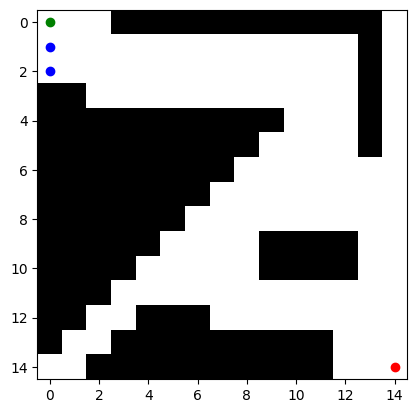

Generation 1999:


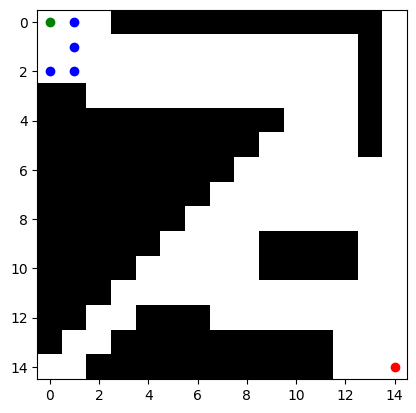

In [ ]:
run_genetic_algorithm()